# Introducció a la base de dades

L'Orient Mitjà es una de les zones del món on la importació de cotxes es molt comú, i constitueix molts països com per exemple: Arabia Saudi, Qatar, Oman, etc...  

<img src="images_notebook/cotxe.jpg">

En aquest Notebook analitzarem les diferències entre els diferents països i intentarem predir el preu que tindrà un cotxe en un determinat pais, ja que la divisa en cada pais es diferent, i el valor no es el mateix.


Aquesta base de dades conté informació sobre diferents cotxes i les seves especificacions tecniques, com per exemple: la amplada, llargada, cilindrada, tipus de benzina, la velocitat maxima, etc... Doncs a partir d'aquestes caracteristiques es podria arribar a predir el preu o aproximar-nos molt.

# Llibreries

Les llibreries de Python que utilitzarem per realitzar l'analisi son les seguents:
<ul>
  <li>Pandas: molt util per estructures de dades en forma de taula, similar a excel</li>
  <li>Numpy: operacions molt eficients amb grans estructures de dades, com matrius o arrays</li>
  <li>Matplotlib: ens permet generar grafiques de tot tipus</li>
  <li>Scipy: similar a numpy, incorpora moltes funcions matematiques</li>
  <li>Seaborn: utilitza com a base matplotlib, i genera grafiques més complexes i amb més estils</li>
  <li>Sklearn: incorpora tots els models d'aprenentatge computacional que utilitzarem per predir, a més de funcions
      per analitzar cada model </li>
</ul>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import math
from prettytable import PrettyTable

# Exploració de les dades

Abans de començar a implementar els models predictius, hem d'analitzar una mica la base de dades que tenim per tal de eliminar
dades que no serveixin, o per determinar els millors atributs que ens maximitzaran el rendiment del model.

In [51]:
dataset = pd.read_csv("BD/dataframe_YesIndex_YesHeader_C.csv")
dataset.head(5)

,Unnamed: 0,Engine Capacity,Cylinders,Drive Type,Fuel Tank Capacity,Fuel Economy,Fuel Type,Horsepower,Torque,Transmission,...,Acceleration,Length,Width,Height,Wheelbase,Trunk Capacity,name,price,currency,Country
0,0,1.2,3,0,42.0,4.9,0,76,100.0,0,...,14.0,4.245,1.670,1.515,2.550,450.0,Mitsubishi Attrage 2021 1.2 GLX (Base),34099.0,0,0
1,1,1.2,3,0,42.0,4.9,0,76,100.0,0,...,14.0,4.245,1.670,1.515,2.550,450.0,Mitsubishi Attrage 2021 1.2 GLX (Base),34099.0,0,0
2,2,1.4,4,0,45.0,6.3,0,75,118.0,1,...,16.0,3.864,1.716,1.721,2.513,2800.0,Fiat Fiorino 2021 1.4L Standard,41250.0,0,0
3,3,1.6,4,0,50.0,6.4,0,102,145.0,0,...,11.0,4.354,1.994,1.529,2.635,510.0,Renault Symbol 2021 1.6L PE,44930.0,0,0
4,4,1.5,4,0,48.0,5.8,0,112,150.0,0,...,10.9,4.314,1.809,1.624,2.585,448.0,MG ZS 2021 1.5L STD,57787.0,0,0


Com es pot veure, la primera columna de la base de dades es una copia del index, i per tant, la eliminarem. També comprovarem que no tenim files duplicades.

In [52]:
dataset = dataset.drop(columns=["Unnamed: 0"])
dataset[dataset.duplicated(keep=False)]

,Engine Capacity,Cylinders,Drive Type,Fuel Tank Capacity,Fuel Economy,Fuel Type,Horsepower,Torque,Transmission,Top Speed,...,Acceleration,Length,Width,Height,Wheelbase,Trunk Capacity,name,price,currency,Country
0,1.2,3,0,42.0,4.9,0,76,100.0,0,170,...,14.0,4.245,1.670,1.515,2.550,450.0,Mitsubishi Attrage 2021 1.2 GLX (Base),34099.0,0,0
1,1.2,3,0,42.0,4.9,0,76,100.0,0,170,...,14.0,4.245,1.670,1.515,2.550,450.0,Mitsubishi Attrage 2021 1.2 GLX (Base),34099.0,0,0
36,2.0,4,0,50.0,7.5,0,150,180.0,0,194,...,10.0,4.165,1.801,1.565,2.600,544.0,Hyundai Kona 2021 2.0L GLS Premium Sunroof,95700.0,0,0
37,2.0,4,0,50.0,7.5,0,150,180.0,0,194,...,10.0,4.165,1.801,1.565,2.600,544.0,Hyundai Kona 2021 2.0L GLS Premium Sunroof,95700.0,0,0
49,1.8,4,0,53.0,6.8,0,140,175.0,0,180,...,10.6,4.257,1.775,1.646,2.555,530.0,Chevrolet Trax 2021 1.8L LT FWD,80300.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4524,3.8,6,1,68.0,9.9,0,560,700.0,1,318,...,3.2,4.506,1.880,1.292,2.450,115.0,Porsche 911 2021 Turbo S Cabriolet,795800.0,2,2
4534,4.0,8,1,80.0,2.9,0,680,850.0,0,310,...,3.5,5.199,1.937,1.432,3.100,405.0,Porsche Panamera 2021 Turbo S E-Hybrid Executive,865500.0,2,2
4535,4.0,8,1,80.0,2.9,0,680,850.0,0,310,...,3.5,5.199,1.937,1.432,3.100,405.0,Porsche Panamera 2021 Turbo S E-Hybrid Executive,865500.0,2,2
4546,3.9,8,2,91.0,11.6,0,610,760.0,0,320,...,3.4,4.922,1.980,1.383,2.990,450.0,Ferrari GTC4Lusso 2021 3.9T V8,1160000.0,2,2


La funció duplicated() ens ha donat 568 files repetides, per tant, hem d'eliminar algunes per deixar una unica fila.

In [53]:
dataset = dataset.drop_duplicates()
dataset[dataset.duplicated(keep=False)]

,Engine Capacity,Cylinders,Drive Type,Fuel Tank Capacity,Fuel Economy,Fuel Type,Horsepower,Torque,Transmission,Top Speed,...,Acceleration,Length,Width,Height,Wheelbase,Trunk Capacity,name,price,currency,Country


També hem de mirar que no existeixin valors NaN a la base de dades, i en cas afirmatiu, eliminar aquestes files.

In [54]:
dataset.isnull().values.any()

False

No hi han valors NaN.  
Ara, veurem si un cotxe amb les mateixes caracteristiques existeix en diferents paisos. Això ens donarà pas
a analitzar en que paisos es més rentable comprar el mateix cotxe.

In [55]:
dataset[dataset["name"] == "Mitsubishi Attrage 2021 1.2 GLX (Base)"]

,Engine Capacity,Cylinders,Drive Type,Fuel Tank Capacity,Fuel Economy,Fuel Type,Horsepower,Torque,Transmission,Top Speed,...,Acceleration,Length,Width,Height,Wheelbase,Trunk Capacity,name,price,currency,Country
0,1.2,3,0,42.0,4.9,0,76,100.0,0,170,...,14.0,4.245,1.67,1.515,2.55,450.0,Mitsubishi Attrage 2021 1.2 GLX (Base),34099.0,0,0
1447,1.2,3,0,42.0,4.9,0,76,100.0,0,170,...,14.0,4.245,1.67,1.515,2.55,450.0,Mitsubishi Attrage 2021 1.2 GLX (Base),4000.0,5,5
2536,1.2,3,0,42.0,4.9,0,76,100.0,0,170,...,14.0,4.245,1.67,1.515,2.55,450.0,Mitsubishi Attrage 2021 1.2 GLX (Base),3000.0,3,3


Amb l'exemple del cotxe que hem buscat a la base de dades, el Mitsubishi Attrage 2021 1.2 GLX, trobem que existeix en 3 paisos diferents, amb les mateixes caracteristiques però amb preus diferents segons el pais.  
Anem ara a explorar una mica més a fons cadascun dels atributs de la nostra base de dades. Primer mostrem una gràfica on es pot veure la diferencia de preus que hi ha entre cada pais.

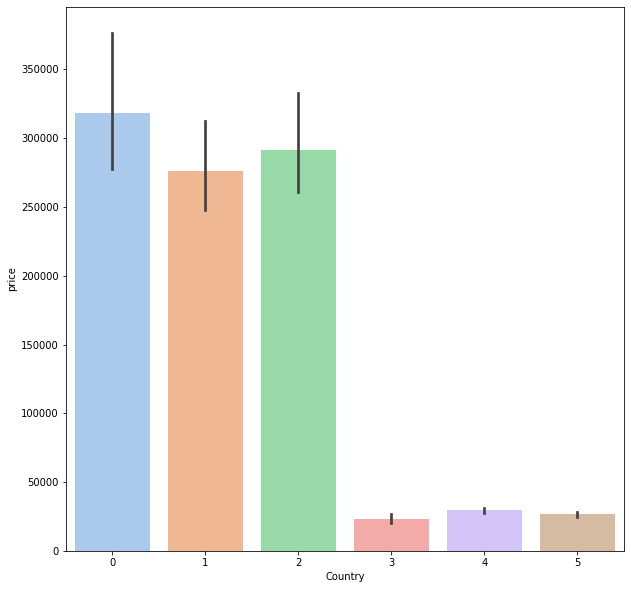

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x="Country", y="price", data=dataset[["price","Country"]],palette='pastel')

(array([ 582.,    0.,  771.,    0.,  626.,    0.,  654.,    0.,  621.,
        1022.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

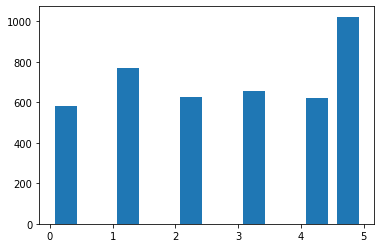

In [57]:
plt.hist(dataset['Country'],rwidth=0.7)

Es pot veure que els ultims paisos o tenen cotxes que costen pocs diners, o la moneda d'aquells paisos es d'un valor baix en comparació amb els altres. També es pot veure que al ultim pais hi ha més cotxes que als altres.  
Ara veurem els atributs de la BD:

In [58]:
print("Els atributs de la nostra BD: ", np.array(dataset.columns))

Els atributs de la nostra BD:  ['Engine Capacity' 'Cylinders' 'Drive Type' 'Fuel Tank Capacity'
 'Fuel Economy' 'Fuel Type' 'Horsepower' 'Torque' 'Transmission'
 'Top Speed' 'Seating Capacity' 'Acceleration' 'Length' 'Width' 'Height'
 'Wheelbase' 'Trunk Capacity' 'name' 'price' 'currency' 'Country']


On 'price' es el atribut target, objectiu o atribut a predir. Escollim el preu com l'objectiu perque volem predir el preu d'un cotxe en diferents paisos per veure en quin sortirà més rentable comprar el cotxe.  

Abans de descriure amb més detall els atributs, generarem una matriu de correlació entre els diferents atributs per tal de determinar els que tinguin major correlació amb el preu, i els altres els eliminarem. Després, dibuixarem un mapa de calor per veure millor les correlacions.

<AxesSubplot:>

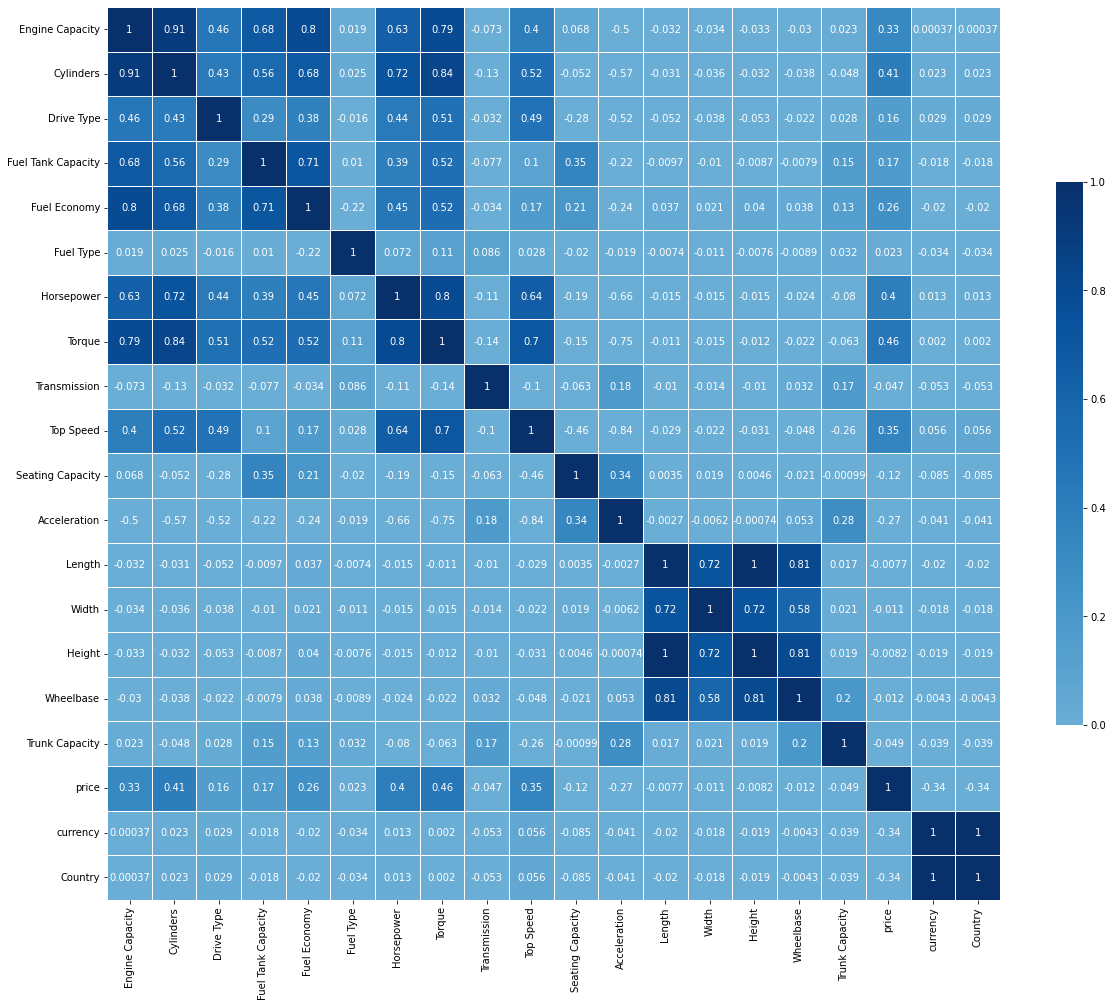

In [59]:
fig, ax = plt.subplots(figsize=(20,20))
cmap = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(dataset.corr(), ax=ax, vmin=0, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Segons podem veure al mapa de calor, els atributs que tenen una forta correlació amb el preu son la cilindrada, la capacitat
del motor, els caballs, la torsió i la velocitat màxima a la que pot arribar un cotxe. Ens quedarem amb aquests 5 atributs,
que ja son suficients per la recta de regressió i tenen una correlació acceptable amb el preu i descartarem els altres.

In [60]:
dataset = dataset[["Torque","Cylinders","Horsepower","Top Speed","Engine Capacity","price"]]
dataset.describe()

,Torque,Cylinders,Horsepower,Top Speed,Engine Capacity,price
count,4276.000000,4276.000000,4276.000000,4276.000000,4276.000000,4.276000e+03
mean,400.978251,5.545370,295.838167,224.523854,3.013471,1.498826e+05
std,194.877648,1.937274,180.654371,41.007010,1.384787,3.536594e+05
min,87.000000,3.000000,67.000000,140.000000,0.000000,2.899000e+03
25%,246.000000,4.000000,170.000000,190.000000,2.000000,1.690000e+04
50%,366.000000,6.000000,275.000000,220.000000,2.900000,5.230000e+04
75%,518.500000,6.000000,380.000000,250.000000,3.700000,1.749000e+05
max,1600.000000,16.000000,5050.000000,420.000000,8.000000,1.078000e+07


La taula del resum dels 5 atributs que hem escollit ens mostra un minim i un maxim molt diferent entre cada atribut. Això pot
arribar a donar problemes quan entrenem els models d'aprenentatge, i per tant, haurem de normalitzar/escalar les dades per
tenir-les totes amb els mateixos rangs.  
Anem a veure una mica com estan distribuides les dades en cada atribut escollit sobre el preu.

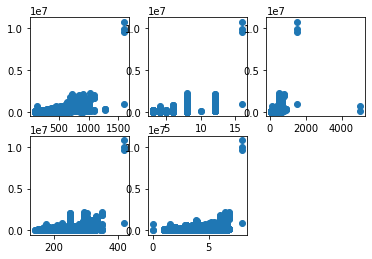

In [61]:
dataset = dataset.values
for i in range(1,6):
    ax = plt.subplot(2,3,i)
    ax.scatter(dataset[:,i-1], dataset[:,-1])

Es pot veure com les dades no estan molt ben distribuides, i per tant, la predicció no serà tan bona com podriem esperar.

# Preparació de les dades

Abans de començar a crear i entrenar els diferents models que utilitzarem per predir el preu d'un cotxe, primer hem de preparar les dades. Primer escalarem les dades per la diferencia d'escala que tenen (ho hem vist a l'apartat d'anàlisi de les dades), i després hem de dividir el conjunt de dades en un conjunt de train i un conjunt de test.

In [62]:
scaler = MinMaxScaler()
scaler.fit(dataset)
dataset = scaler.transform(dataset)

x = dataset[:,:5]
y = dataset[:,-1]

print("Valor minim: " + str(np.amin(dataset)) + " - Valor maxim: " + str(np.amax(dataset)))

Valor minim: 0.0 - Valor maxim: 1.0


Ara que totes les dades les tenim escalades amb el mateix rang de valors, anem a dividir el conjunt de dades. Dividirem el conjunt en un 80% de les dades per el train, i un 20% per validar cada un dels models.

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

# Creació dels models

Per aquest problema implementarem 3 models diferents amb els parametres <b> per defecte </b> i els compararem per veure quin dona millors resultats.

## Multivariable Linear Regressor

Primer creem el model:

In [64]:
linear_reg = LinearRegression()

Després entrenem el model amb les dades de train:

In [65]:
linear_reg.fit(x_train, y_train)

LinearRegression()

Ara fem una predicció i evaluem el rendiment:

In [66]:
prediccions = linear_reg.predict(x_test)
print("Coeficient de determinació del model: " + str(linear_reg.score(x_test, y_test)))
print("Error quadratic mitja: " + str(mean_squared_error(y_test, prediccions)))

Coeficient de determinació del model: 0.2109561848947339
Error quadratic mitja: 0.0013321540248318617


Com podem veure, el coeficient de determinació R2 ens dona 0.21, un valor bastant allunyat del millor possible, que seria 1. Per tant, la predicció no ha sigut molt bona.  
Si visualitzem la predicció...

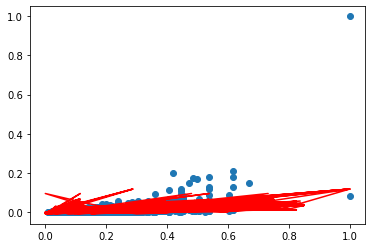

In [67]:
plt.figure()
ax = plt.scatter(x_test[:,0], y_test)
plt.plot(x_test, prediccions, 'r')

Com podem veure, la regressió ha pogut predir molts punts, però altres estan fora d'aquesta funció que ha definit la regressió lineal multivariable.

## Decision Tree Regressor

Primer creem el model:

In [68]:
decision_tree = DecisionTreeRegressor()

Després l'entrenem amb les dades de train:

In [69]:
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor()

Ara veurem una mica les caracteristiques d'aquest arbre que s'ens ha generat:

In [70]:
print("Profunditat del arbre: " + str(decision_tree.get_depth()))
print("Numero de fulles del arbre: " + str(decision_tree.get_n_leaves()))

Profunditat del arbre: 24
Numero de fulles del arbre: 809


L'arbre que ha generat es molt gran, ja que té 809 nodes fulla i una profunditat de 24, però amb aquesta grandaria esperem que la regressió surti millor que la anterior.  
Anem a fer una predicció i evaluar el rendiment:

In [71]:
prediccions_arbre = decision_tree.predict(x_test)
print("Coeficient de determinació del model: " + str(decision_tree.score(x_test, y_test)))
print("Error quadratic mitja: " + str(mean_squared_error(y_test, prediccions_arbre)))

Coeficient de determinació del model: 0.31567422150564717
Error quadratic mitja: 0.0011553570570676474


L'arbre ha predit una mica millor, ha pujat el coeficient de determinació i l'error quadratic mitjà ha baixat una mica també.  
Si visualitzem la predicció...

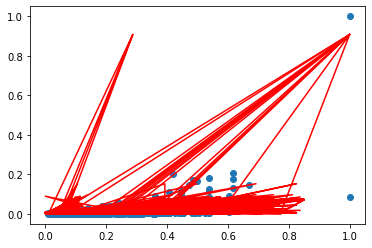

In [72]:
ax = plt.scatter(x_test[:,0], y_test)
plt.plot(x_test, prediccions_arbre, 'r')

Es pot veure com l'arbre de decisió ha intentat predir inclús els punts que s'allunyen dels altres. Aquesta diferencia respecte amb la regressió lineal multivariable es deguda al tamany del arbre, que també ha generat casos pels punts més allunyats dels altres.

## Random Forest Regressor

Primer creem el model:

In [73]:
random_tree = RandomForestRegressor()

Després l'entrenem amb les dades de train:

In [74]:
random_tree.fit(x_train, y_train)

RandomForestRegressor()

Ara fem una predicció i evaluem el rendiment:

In [75]:
prediccions_randtree = random_tree.predict(x_test)
print("Coeficient de determinació del model: " + str(random_tree.score(x_test, y_test)))
print("Error quadratic mitja: " + str(mean_squared_error(y_test, prediccions_randtree) ))

Coeficient de determinació del model: 0.4380518276531964
Error quadratic mitja: 0.0009487451839906157


Com podem veure, el Random Forest ha pogut millorar encara més el rendiment dels altres dos models. El coeficient de determinació l'ha augmentat en un 10%, i també ha baixat una mica més el error quadratic mitjà.  
Si visualitzem la predicció un cop més...

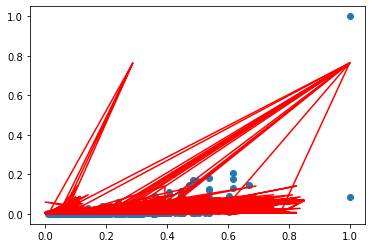

In [76]:
ax = plt.scatter(x_test[:,0], y_test)
plt.plot(x_test, prediccions_randtree, 'r')

El Random Forest ha fet la regressió de forma similar al Decision Tree, ja que es pot veure una funció de regressió molt semblant a la anterior.  
  
En aquesta taula deixem un resum del rendiment dels 3 models:

In [83]:
table = PrettyTable()
table.field_names = ["Model", "R2 score", "MSE"]
table.add_row(["Linear Regressor",linear_reg.score(x_test, y_test),mean_squared_error(y_test, prediccions)])
table.add_row(["Decision Tree",decision_tree.score(x_test, y_test),mean_squared_error(y_test, prediccions_arbre)])
table.add_row(["Random Forest",random_tree.score(x_test, y_test),mean_squared_error(y_test, prediccions_randtree)])
print(table)

+------------------+---------------------+-----------------------+
|      Model       |       R2 score      |          MSE          |
+------------------+---------------------+-----------------------+
| Linear Regressor |  0.2109561848947339 | 0.0013321540248318617 |
|  Decision Tree   | 0.31567422150564717 | 0.0011553570570676474 |
|  Random Forest   |  0.4380518276531964 | 0.0009487451839906157 |
+------------------+---------------------+-----------------------+


# Cerca dels millors hiperparametres

Un cop hem vist el rendiment de cadascun dels 3 models amb els parametres per defecte, ara anem a buscar quins son els millors parametres que maximitzen el rendiment de cadascun dels 3 models, i així podrem escollir el que presenti major rendiment amb els seus parametres òptims.